In [1]:
library(rstan)
library(bayesplot)
library(ggfortify)
library(gridExtra)

rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
source("plotSSM.R", encoding = "utf-8")

Loading required package: StanHeaders
Loading required package: ggplot2
rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
This is bayesplot version 1.7.0
- Online documentation and vignettes at mc-stan.org/bayesplot
- bayesplot theme set to bayesplot::theme_default()
   * Does _not_ affect other ggplot2 plots
   * See ?bayesplot_theme_set for details on theme setting


In [2]:
sales_df_4  <- read.csv("https://raw.githubusercontent.com/logics-of-blue/book-r-stan-bayesian-model-intro/master/book-data/5-6-1-sales-ts-4.csv")
sales_df_4$date <- as.POSIXct(sales_df_4$date)
head(sales_df_4)

date,sales
<dttm>,<dbl>
2010-01-01,81.1
2010-01-02,127.7
2010-01-03,119.5
2010-01-04,55.8
2010-01-05,71.1
2010-01-06,83.8


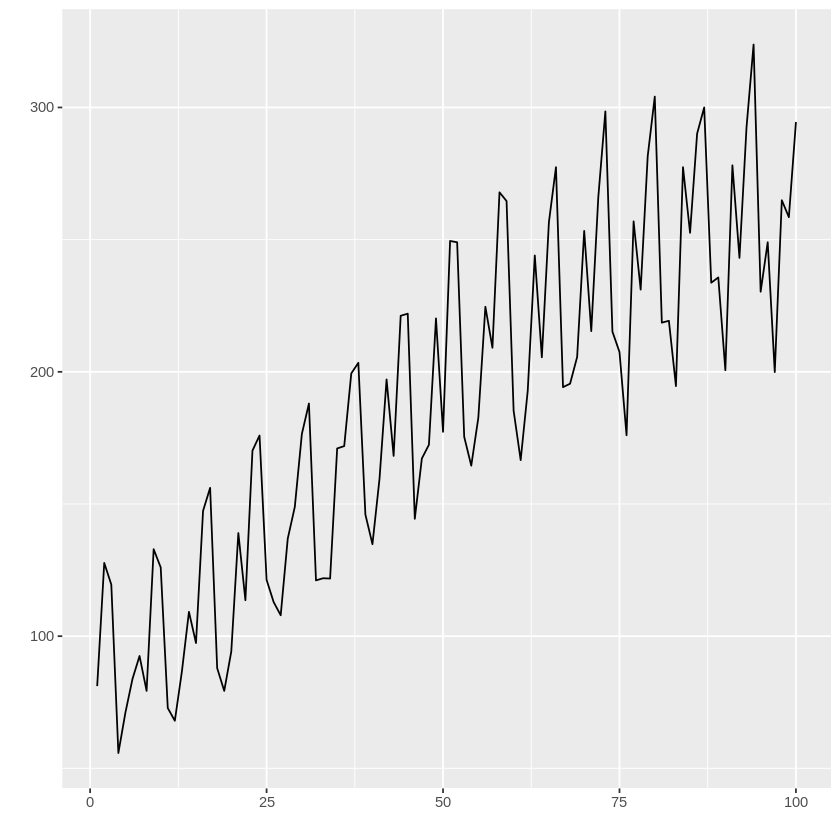

In [3]:
autoplot(ts(sales_df_4[, -1]))

In [5]:
data_list <- list(
    y = sales_df_4$sales,
    T = nrow(sales_df_4)
)

basic_structual <- stan(
    file = "5-6-1-basic-structual-time-series.stan",
    data = data_list,
    seed = 1,
    iter = 8000,
    warmup = 2000,
    thin = 6,
    control = list(adapt_delta = 0.97, max_treedepth = 15)
)

print(basic_structual,
      par = c("s_z", "s_s", "s_v", "lp__"),
      probs = c(0.025, 0.5, 0.975)
)

Warning message:
“There were 4 chains where the estimated Bayesian Fraction of Missing Information was low. See
http://mc-stan.org/misc/warnings.html#bfmi-low”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess”

Inference for Stan model: 5-6-1-basic-structual-time-series.
4 chains, each with iter=8000; warmup=2000; thin=6; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean    sd    2.5%     50%   97.5% n_eff Rhat
s_z     0.24    0.01  0.10    0.10    0.22    0.49   356 1.01
s_s     4.19    0.02  0.95    2.49    4.14    6.18  1664 1.00
s_v     7.39    0.02  0.98    5.57    7.37    9.39  2221 1.00
lp__ -326.03    2.19 41.29 -405.91 -326.08 -245.06   357 1.01

Samples were drawn using NUTS(diag_e) at Sun Jul 28 09:18:55 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


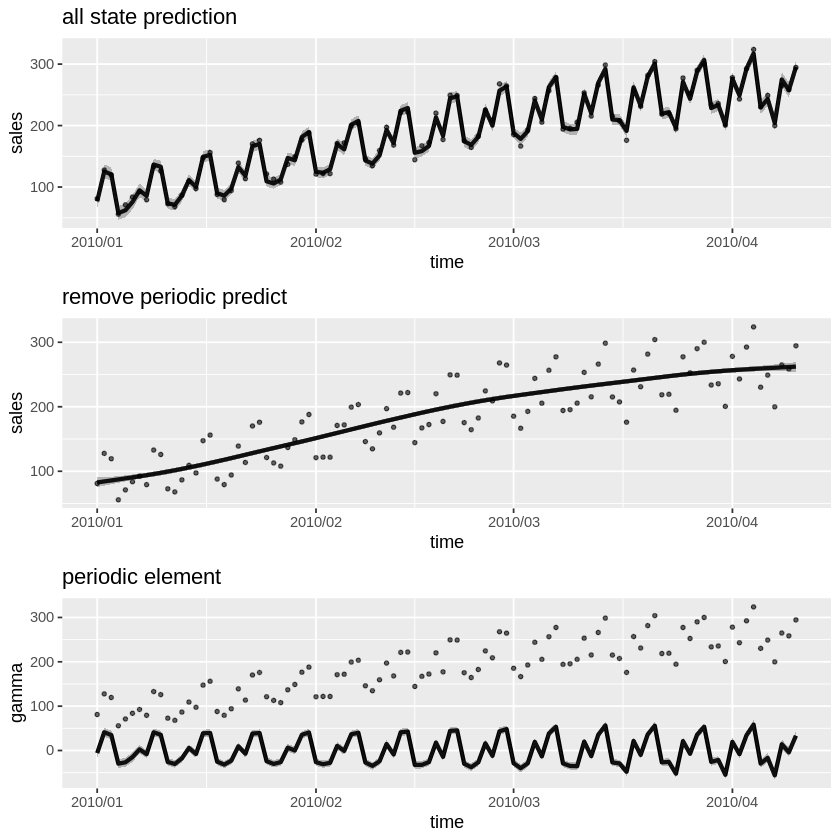

In [6]:
mcmc_sample <- rstan::extract(basic_structual)

p_all <- plotSSM(
    mcmc_sample = mcmc_sample,
    time_vec = sales_df_4$date,
    obs_vec = sales_df_4$sales,
    state_name = "alpha",
    graph_title = "all state prediction",
    y_label = "sales"
)

p_trend <- plotSSM(
    mcmc_sample = mcmc_sample,
    time_vec = sales_df_4$date,
    obs_vec = sales_df_4$sales,
    state_name = "mu",
    graph_title = "remove periodic predict",
    y_label = "sales"
)

p_cycle <- plotSSM(
    mcmc_sample = mcmc_sample,
    time_vec = sales_df_4$date,
    obs_vec = sales_df_4$sales,
    state_name = "gamma",
    graph_title = "periodic element",
    y_label = "gamma"
)

grid.arrange(p_all, p_trend, p_cycle)